# Machine Learning

## Общие сведения по проекту

**Краткое описание:** Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Цель** — провести анализ и подготовить план действий по удержанию клиентов:
* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
	1) выделить целевые группы клиентов;
	2) предложить меры по снижению оттока;
	3) определить другие особенности взаимодействия с клиентами.


**Описание данных:**
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.


**План работы:**
1. Загрузите данные;
2. Провести исследовательский анализ данных;
3. Построить модель прогнозирования оттока клиентов;
4. Сделать кластеризацию клиентов;
5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами.

## Загрузка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Открытие файла с использованием конструкции try-except
try:
    df = pd.read_csv('C:/Users/ADMIN/Downloads/11_ML/gym_churn.csv') # Локальный путь
except:
    df = pd.read_csv('/datasets/gym_churn.csv') # Серверный путь

In [3]:
# Снятие ограничений на отражение максимального коливества столбцов и символов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Исследовательский анализ данных

### Общая информация о датафрейме

In [4]:
# Вывод информации о датафрейме
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [5]:
# Приведение наимнований столбцов к стилю python
df.columns = df.columns.str.lower()

In [6]:
# Получение первых 5 строк таблицы df
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [7]:
# Подсчет количества дубликатов
df.duplicated().sum()

0

**Вывод:** в исходных данных 4000 записей и 14 столбцов, пропуски отсутствуют. Название столбцов скорректировано в соответствии со стилем python (нижний курсив). Типы данных не требуют изменений. Дубликаты отсутствуют.

### Средние значения тех, кто ушел в отток и тех, кто остался

In [8]:
# Группировка по признаку оттока и вывод средних значений
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Вывод:** те, кто уходит в отток в среднем моложе, реже пользуются акцией "приведи друга", чаще используют абонемент с наименьшей длительностью, меньше посещают групповые занятия и как правило уходят в первые месяцы после записи в фитнес-центр.

### Cтолбчатые гистограммы и распределения признаков (остались / ушли)

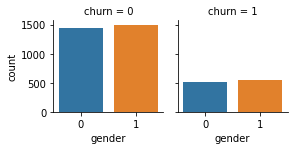

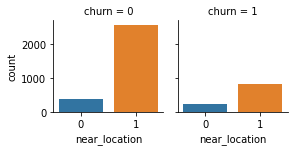

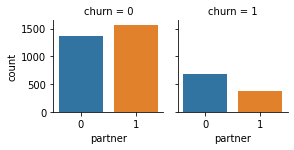

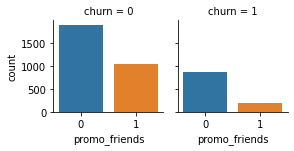

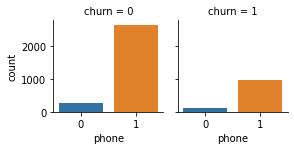

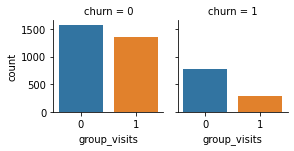

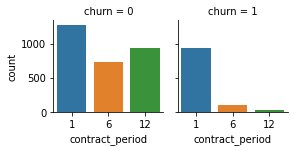

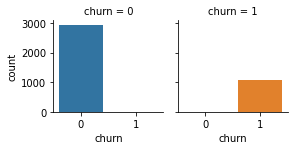

In [9]:
# Определение бинарных значений в отдельном датафрейме
binar_value = df[['gender', 'near_location', 'partner','promo_friends', 'phone', 
                  'group_visits', 'contract_period', 'churn']]

# Построение столбчатых диаграмм
for col in binar_value.columns:
    sns.catplot(col, col="churn", data = binar_value, kind="count", height=2)

**Вывод:** диаграммы подтверждают ранее сделанные выводы по средним значениям.

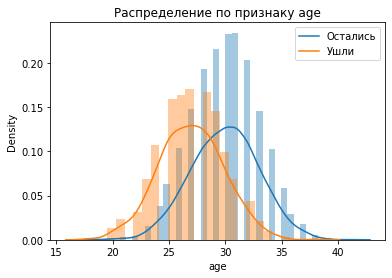

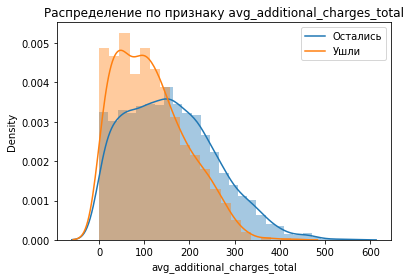

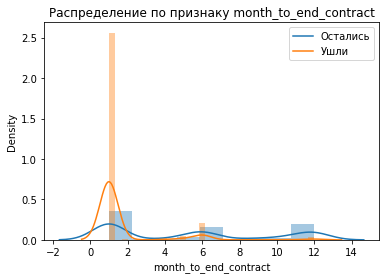

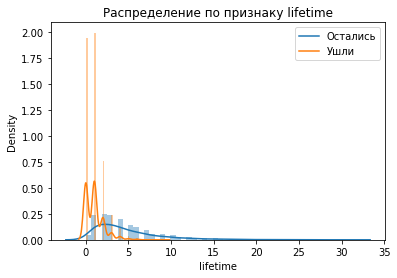

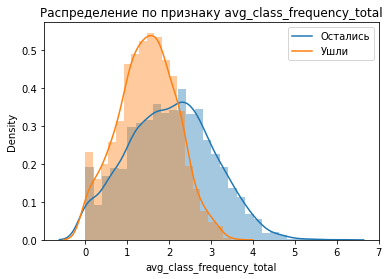

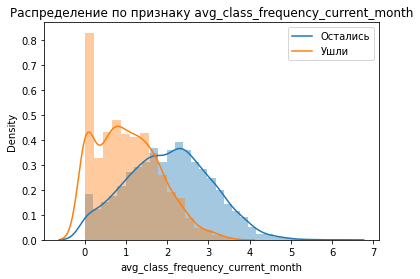

In [10]:
# Создание срезов по churn
churn_0 = df.query('churn == 0')
churn_1 = df.query('churn != 0')

# Список признаков с небинарными значениями
num_value = df.drop(columns =(['gender', 'near_location', 'partner','promo_friends', 'phone', 
                               'group_visits', 'contract_period', 'churn'])).columns
# Построение распределений
for col in num_value:
    sns.distplot(churn_0[col])
    sns.distplot(churn_1[col])
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение по признаку ' + col)
    plt.show()

**Выводы:** люди со средним возрастом около 30 лет реже уходят, чем люди со средним возрастом 25-27 лет. В отток попадают клиенты, которые тратят меньше, реже 3 раз в неделю посещают фитнес-центр и как правило являются новичками. Если человек посещает фитнес-центр более 5 месяцев или более 3 раз в месяц, то скорей всего останется постоянным клиентом при прочих равных.

### Матрица корреляций

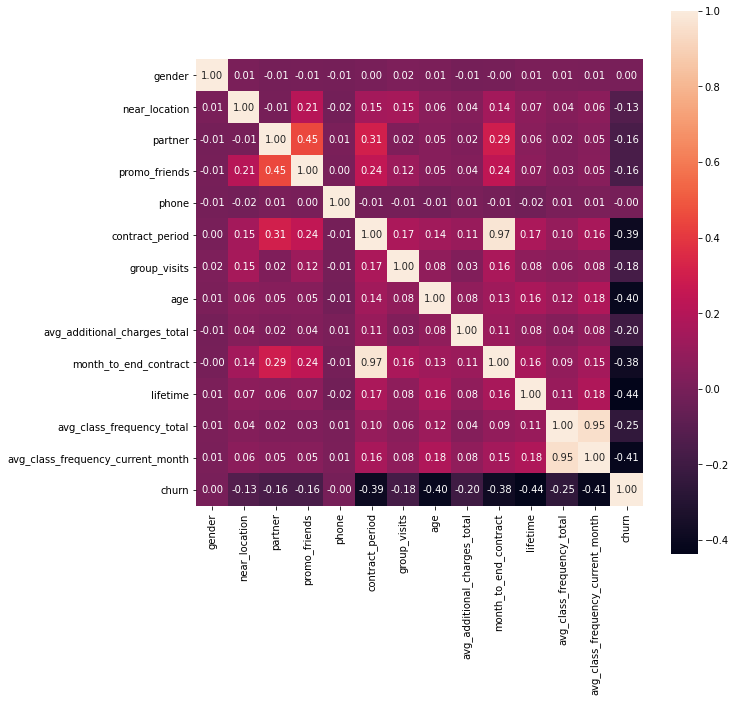

In [11]:
# Создание и вывод матрицы корреляций
cm = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt = '.2f', square=True)
plt.show()

**Вывод:** наблюдается сильная корреляция:
* 0.97 между `contact_period` (длительность текущего действующего абонемента (месяц, 6 месяцев, год)) и `month_to_end_contract` (срок до окончания текущего действующего абонемента (в месяцах)) - признаки взаимосвязаны.
* 0.95 между `avg_class_frequency_total` (средняя частота посещений в неделю за все время с начала действия абонемента) и `avg_class_frequency_current_month` (средняя частота посещений в неделю за предыдущий месяц) - признаки взаимосвязаны.

Стоит отметить среднюю корреляцию 0.45 между `promo_friends` (факт первоначальной записи в рамках акции «приведи друга») и `partner` (сотрудник компании-партнёра клуба) - вероятно сотрудники компании-партнёра клуба чаще приглашают своих друзей.

## Модель прогнозирования оттока клиентов

In [12]:
# Удаление сильно коррелирующих признаков для исключения мультиколлинеарности
df_clear = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

# Разделение данных на признаки (матрица X) и целевую переменную (y) в соотношении 80:20
X = df_clear.drop('churn', axis = 1)
y = df_clear['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [13]:
# Определение функции, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [14]:
# Применение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразование обучающего и валидационного наборов данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Определение алгоритма для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# Обучение модели
lr_model.fit(X_train_st, y_train)

# Использование обученной модели для определения прогнозов
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# Вывод метрик
print_all_metrics(y_test, lr_predictions, lr_probabilities,
    title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.86
	Recall: 0.79
	F1: 0.83
	ROC_AUC: 0.96


In [15]:
# Определение алгоритма для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# Обучение модели случайного леса
rf_model.fit(X_train_st, y_train)

# Использование обученной модели для определения прогнозов
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# Вывод метрик
print_all_metrics(y_test, rf_predictions, rf_probabilities,
    title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80
	F1: 0.82
	ROC_AUC: 0.95


**Вывод:** по всем вычисленным метрикам мадели практически не отличаются друг от друга, но модель линейной регрессии обладает более лучшими показателями. Обе модели получились высокого качества: ROC_AUC > 0.9.

## Кластеризация клиентов

### Построение дендрограммы

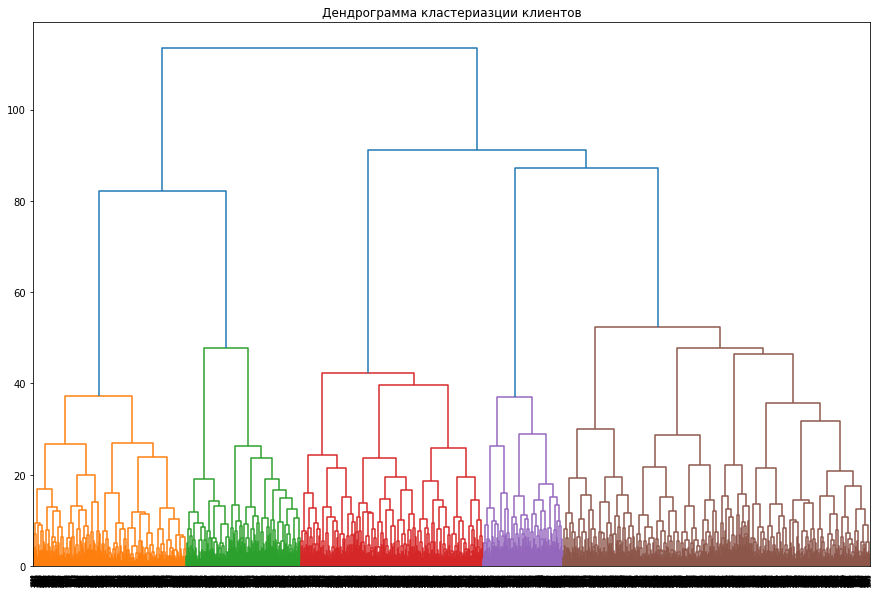

In [16]:
# Стандартизация данных
sc = StandardScaler()
x_sc = sc.fit_transform(df)

# Сохранение «связок» между объектами
linked = linkage(x_sc, method = 'ward')

# Визуализация linked в виде дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластериазции клиентов')
plt.show()

**Вывод:** на основании полученной дендрограммы можно выделить 5 кластеров.

### K-Means

In [17]:
# Определение модели K-Means с количеством кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# Прогнозирование кластеров для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# Сохрнение метки кластера в поле датасета
df['cluster_km'] = labels

# Средние значения признаков для кластеров
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


**Вывод:** кластера 1, 3, 4 имеют самые низкие показатели оттока, их можно определить как "надежные". Самым высоким показателем оттока обладает кластер 2.

### Распределения признаков для кластеров

In [18]:
# Определение бинарных значений в отдельном датафрейме
binar_value = df[['gender', 'near_location', 'partner','promo_friends', 'phone', 
                  'group_visits', 'contract_period', 'churn', 'cluster_km']]

# Определение небинарных значений в отдельном датафрейме
num_value = df.drop(columns =(['gender', 'near_location', 'partner','promo_friends', 'phone', 
                               'group_visits', 'contract_period', 'churn', 'cluster_km']))

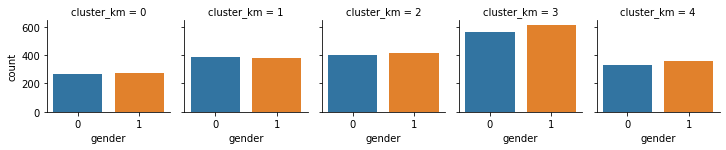

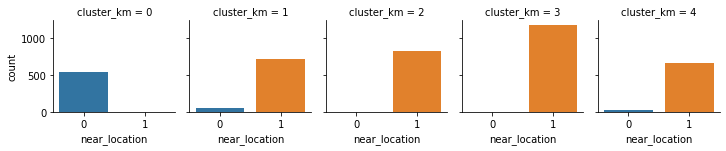

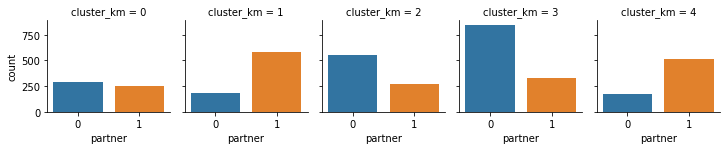

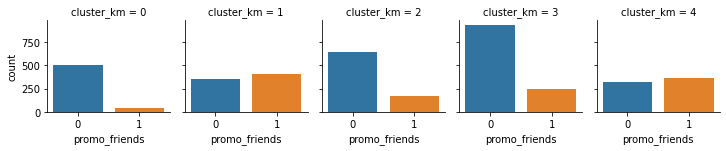

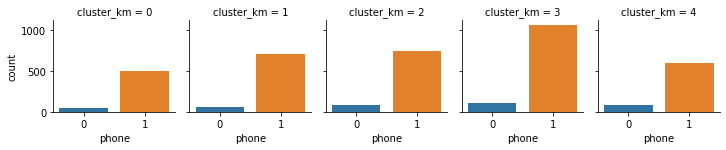

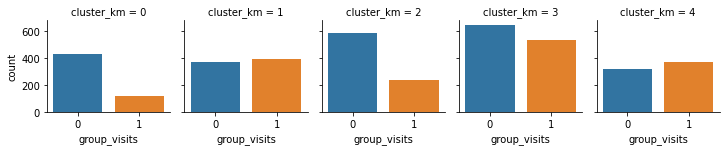

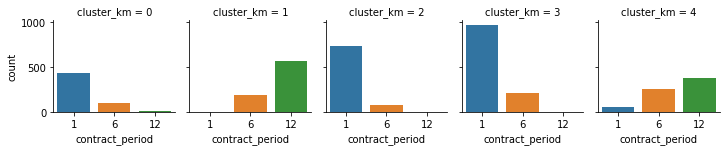

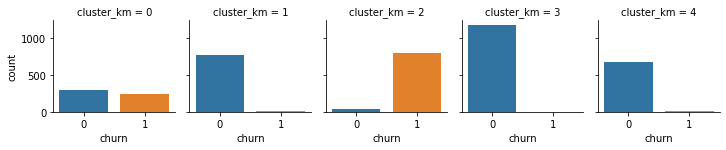

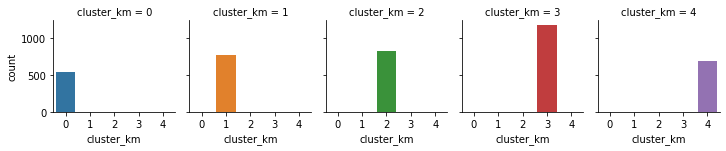

In [19]:
# Построение столбчатых диаграмм
for col in binar_value.columns:
    sns.catplot(col, col="cluster_km", data = binar_value, kind="count", height=2)

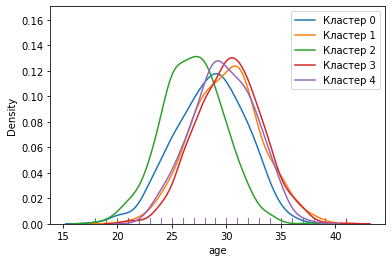

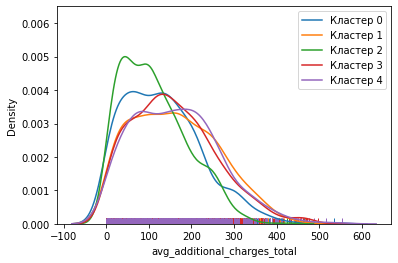

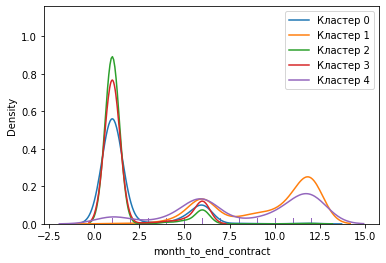

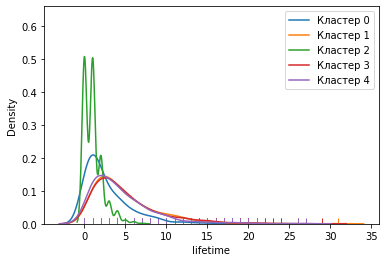

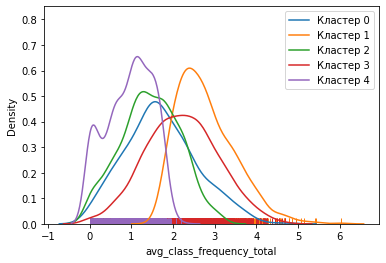

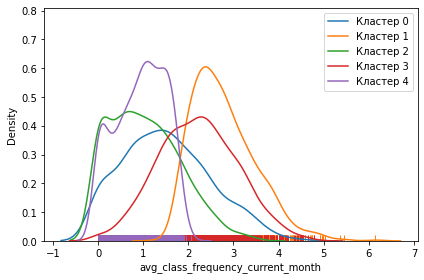

In [20]:
# Построение распределений
for col in num_value:
    plt.figure()
    for i in range(0,5):
        sns.distplot(df.query('cluster_km == @i')[col],
                    hist=False,
                    rug=True,
                    kde_kws={'label':'Кластер '+ str(i)})
        plt.legend()
plt.tight_layout()

**Вывод:**
* **Кластер 0:** клиенты проживают или работают в районе, где нет фитнес-центра, крайне мало используют акцию "приведи друга", предпочитают одномесячные абонементы и имеют средние значения оттока.

* **Кластер 2:** молодые люди с высокой склонностью к оттоку, проживают или работают в районе, где находится фитнес-центр, не тратят много средств, предпочитают одномесячные абонементы и не возвращаются в первые месяцы после регистрации.

* **Кластеры 1, 3 и 4:** постоянные клиенты, наиболее многочисленные, проживают или работают в районе, где находится фитнес-центр, чаще других посещают групповые занятия, при этом одна часть из них больше предпочитает одномесячные абонементы, а другая часть - годовые/полугодовые.

## Общий вывод

Для снижения показателей оттока необходимо сфокусироваться на новых клиентах молодого возраста (скорей всего студенты с невысоким доходом), которые приобретают одномесячные абонементы.

Возможно стоит создать акцию со скидкой на полугодовые/годовые абонементы при регистрации для студентов или людей с возрастом до 27 лет.

Определенно, в фитнес-центре что-то не устраивает молодых людей, если среди них наблюдается наибольший отток. Необходимо провести анкетирование и собрать обратную связь, возможно причина кроется в тарифах / оборудовании / тренерах.

Постоянные клиенты практически не имеют склонности к оттоку, но при это покупают одномесячные абонементы. Для снижения рисков следует разработать программу лояльности для дальнейшего удержания постоянных клиентов.